In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
logistic function is 1/(1+exp(-x))

In [11]:
l = list(range(-10, 10))

In [14]:
logistic_func = [ 1/(1 + np.exp(-x)) for x in l]

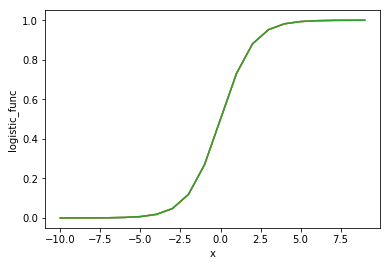

In [21]:
plt.plot(l, logistic_func)
plt.xlabel("x")
plt.ylabel("logistic_func")
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
data = pd.read_csv("titanic.csv")

In [129]:
data.shape

(887, 8)

In [130]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [131]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


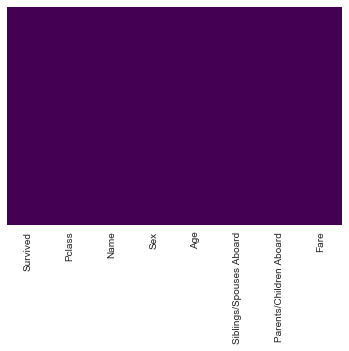

In [133]:
#below statement shows null values in dataset by graphically.
#there is no null vales in the data set. 
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

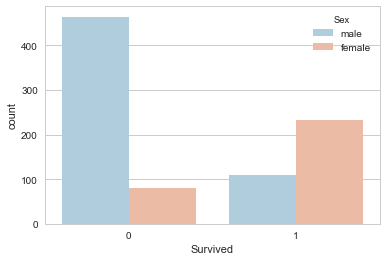

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')

As see in the above graph, Number of NOT survivors is high and number of Males is high.
Number of Females is high compared to number of Males in survivors count

# Number of Survivors and NOT Survivors by ticket class

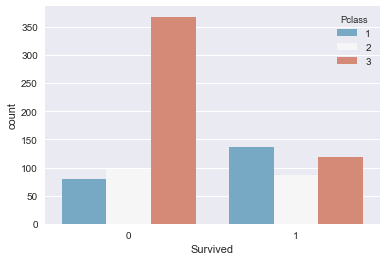

In [135]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=data, palette='RdBu_r')

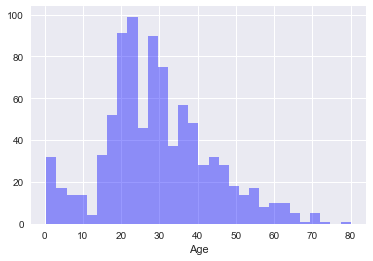

In [136]:
sns.distplot(data['Age'], kde=False, bins=30, color='blue')

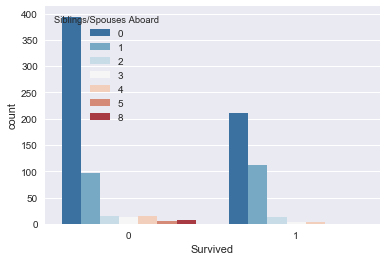

In [137]:
sns.countplot(x='Survived', hue='Siblings/Spouses Aboard', data=data, palette='RdBu_r')

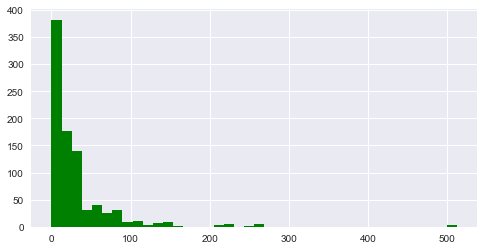

In [138]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [139]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [142]:
pd.get_dummies(data['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [143]:
sex = pd.get_dummies(data['Sex'],drop_first=True)

In [144]:
data.drop(['Sex','Name'],axis=1,inplace=True)

In [145]:
data = pd.concat([data,sex],axis=1)
data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
           data['Survived'], test_size=0.30)

In [148]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((620, 6), (267, 6), (620,), (267,))

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
predictions = logmodel.predict(X_test)

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.83      0.82       157
          1       0.75      0.72      0.73       110

avg / total       0.79      0.79      0.79       267



In [153]:
import sklearn
from sklearn.metrics import confusion_matrix

In [154]:
print(confusion_matrix(y_test, predictions))

[[131  26]
 [ 31  79]]


From our confusion matrix we conclude that:

    True positive: 144(We predicted a positive result and it was positive)
    True negative: 76(We predicted a negative result and it was negative)
    False positive: 25(We predicted a positive result and it was negative)
    False negative: 22(We predicted a negative result and it was positive)

In [155]:
#Accuracy = (TP+TN)/total
Accuracy = (144+76)/267
print("Accuracy is {0}%".format(np.round(Accuracy*100), 4))

Accuracy is 82.0%


In [156]:
#Error Rate = (FP+FN)/total
Error = (25+22)/267
print("Error Rate is {0}%".format(np.round(Error*100), 4))

Error Rate is 18.0%
